## Optical flow estimation

In this lab we will be working on the optical flow estimation with
<a href="https://en.wikipedia.org/wiki/Lucas%E2%80%93Kanade_method"> Lucas Kanade algorithm</a>. It is a very well known algorithm based on derivative estimation.
   
   



We will first analyse our own implementation of a dense estimator, we will then compare it with the OpenCV implementation which is a sparse one (computed on corners only)

In [11]:
from google.colab import drive

drive.mount('/content/drive')

%cd drive/MyDrive/DLCV2024_for_students/labs/LAB_OF


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DLCV2024_for_students/labs/LAB_OF


In [ ]:
/content/drive/MyDrive/DLCV2024_for_students/labs/LAB_OF

In [12]:
import numpy as np
import cv2 as cv2
from scipy import signal
import matplotlib.pyplot as plt
from visualize_flow import flow_to_color
import time
%matplotlib inline


## Data
Inside the folder 'Data' you will find different image sequences, they capture different type of motion. Have a look at them first, and choose with what type of data you would like to work. <b> Try several image pairs! </b>

The input of optical flow is a pair of subsequent image frames, in fact, given an image sequence, you could try out different pairs

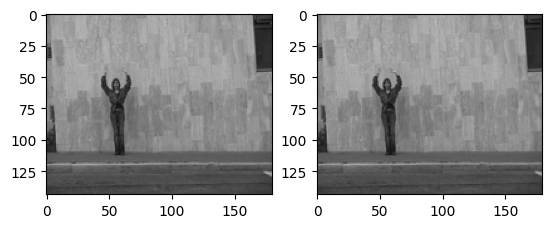

In [36]:
# LOAD AND VISUALIZE AN IMAGE PAIR

#img1= cv2.imread('Data/EmptyScene01.jpg',cv2.IMREAD_GRAYSCALE)
#img2= cv2.imread('Data/EmptyScene02.jpg',cv2.IMREAD_GRAYSCALE)
img1= cv2.imread('Data/waving/JPEGImages/daria_wave2004.png',cv2.IMREAD_GRAYSCALE)
img2= cv2.imread('Data/waving/JPEGImages/daria_wave2005.png',cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## 1. A first analysis: change detection

Let us start from something simple: compute the absolute difference of the images you just loaded. If you don't know how to do, have a look at the function cv2.absdiff from OpenCV

(<Axes: >, <matplotlib.image.AxesImage at 0x7e4b40795f60>)

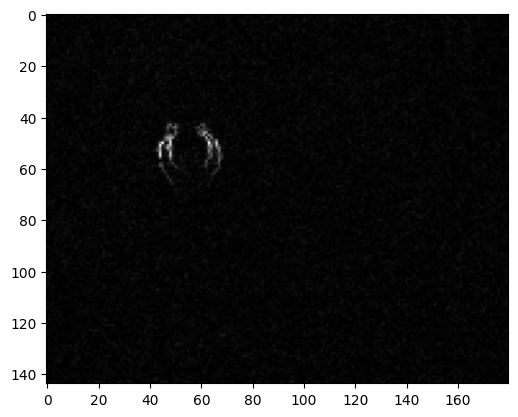

In [37]:
abs = cv2.absdiff(img1, img2)
plt.subplot(1,1,1),plt.imshow(abs ,cmap = 'gray')

In [38]:
# FILL IN HERE: compute and visualize the absolute difference between img1 and img2

## 2. Lucas Kanade: our dense implementation

This is an already implemented function for the dense estimation of OF based on Lucas Kanade (see slides). Have a look at the code first, you should be able to understand every step of it (if not... ask!)

In [39]:
def Lucas_Kanade(im1,im2,window_size):
    kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
    kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
    kernel_t = np.array([[1., 1.], [1., 1.]])*.25
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = im1 / 255. # normalize pixels
    I2g = im2 / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    # you may want to try uncommenting the comments in the two lines below (notice any difference?)
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode) #+ signal.convolve2d(I2g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode) #+ signal.convolve2d(I2g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I1g, kernel_t, boundary='symm', mode=mode) +signal.convolve2d(I2g, -kernel_t, boundary='symm', mode=mode)

    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)

    # within window window_size * window_size

    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].transpose().flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].transpose().flatten()
            It = np.array(ft[i-w:i+w+1, j-w:j+w+1].transpose().flatten())

            A = np.transpose(np.array([Ix ,Iy]))

            AT =A.transpose()

            ATA = np.matmul(AT,A)
            It = -It

            Inv = np.linalg.pinv(ATA)
            U = np.matmul(np.matmul(Inv,AT),It)
            u[i,j]=U[0]
            v[i,j]=U[1]

    return (u,v)

Call the previously defined function on the image pair and <b> reason on the impact of different window sizes </b> (notice the larger the window the slowlier the method)

In [40]:
start = time.time()
window=3 #assuming that motion is constant inside this window (N)
[u,v] = Lucas_Kanade(img1,img2,window)
print("Elapsed time is %d seconds"%(time.time()-start) )

Elapsed time is 1 seconds


Let's visualize the results of the flow field (this type of visualization is a bit confusing sometimes)

(144, 180)
(144, 180)


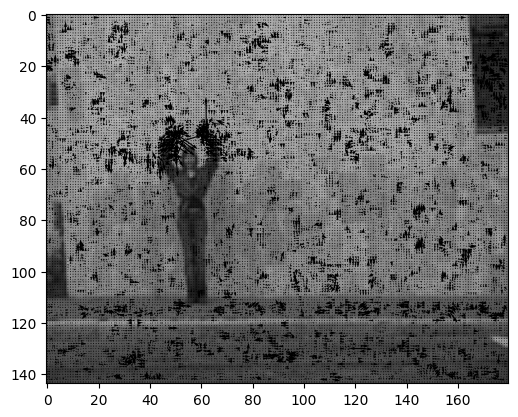

In [41]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.quiver(u,v)

Let's visualize the flow field using a color-coding algorithm ( See https://github.com/tomrunia/OpticalFlow_Visualization)

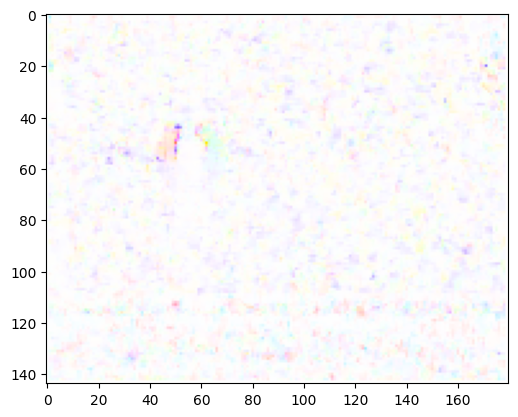

In [42]:
flow = np.stack([u,v],axis=2)
plt.imshow(flow_to_color(flow,convert_to_bgr=False))

In [43]:
### FILL IN HERE

# fix img1 and load two or three different versions of img2 (the following frame)
# and more distant ones
# load the optical flow you obtain for at least 3 choices of window



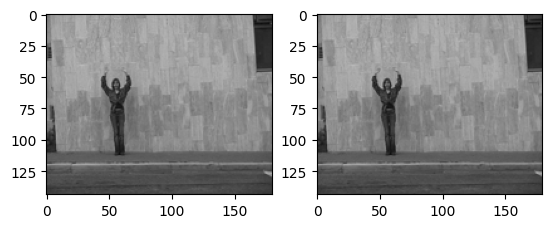

In [53]:
img1= cv2.imread('Data/waving/JPEGImages/daria_wave2004.png',cv2.IMREAD_GRAYSCALE)
img2= cv2.imread('Data/waving/JPEGImages/daria_wave2010.png',cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [54]:
start = time.time()
window=3 #assuming that motion is constant inside this window (N)
[u,v] = Lucas_Kanade(img1,img2,window)
print("Elapsed time is %d seconds"%(time.time()-start) )

Elapsed time is 1 seconds


In [55]:
## FILL IN HERE

# visualize all the results of above

(144, 180)
(144, 180)


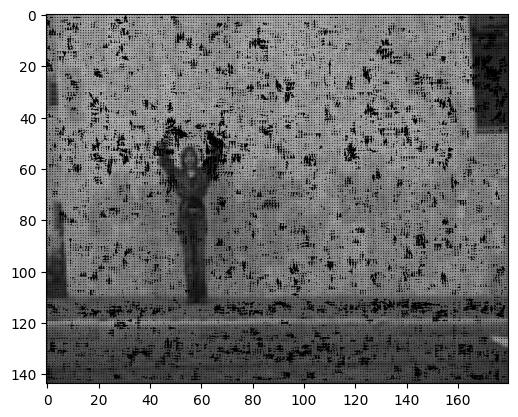

In [56]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.quiver(u,v)

## 3. Lucas Kanade: sparse OpenCV implementation

The algorithm evaluates optical flow on sparse points (corners) in order to avoid the ill-posed inversion of A'A.
Additionally, Optical flow is calculated and combined on different scales (hierarchical implementation) to handle large-displacements

In [57]:
#parameters of the corner detection procedure
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


- Call the function that detects the key-points (Shi-Tomasi corners) from the first frame

- Call LK Flow algorithm which returns the positions of these key points in the second frame

In [58]:
p0 = cv2.goodFeaturesToTrack(img1, mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(img1, img2, p0, None, **lk_params)

Draw vectors to connect points from the first frame and the second frame to visualize the motion vectors

(17, 2)


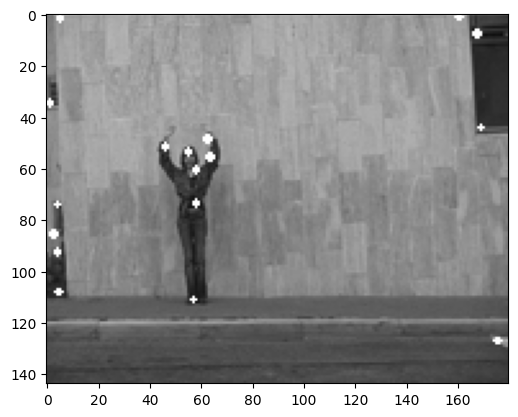

In [59]:
good_new = p1[st==1]
good_old = p0[st==1]
mask = np.zeros_like(img1)
print(good_old.shape)
for i,(new,old) in enumerate(zip(p1,p0)):
    a,b = np.int32(new.ravel())

    c,d = np.int32(old.ravel())
    mask = cv2.line(mask, (a,b),(c,d), [255,255,0], 2)
img2 = cv2.add(img2,mask)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))


 ## Take-home messages:

### Sparse vs Dense
- with a dense estimate we obtain a full estimate of the motion, but it can be noisy (in particular in uniform areas).
- conversely, a sparse approach focuses on reliable/stable points (not affected by the aperture problem) but it provides a lot less information

### Size of the window
- These implementations of LK are based on local constancy of motion assumption, which may be wrong in general. From this point of view, small windows are better.
- Also, larger windows are computationally more expensive
- At the same time with larger windows we obtain a smoother estimate (did you notice this?)

## A final question


- Could we consider the use of this algorithm (dense version) to estimate a disparity map?